<a href="https://colab.research.google.com/github/DanyloHenrique/FuzzyControleArcondicionado/blob/main/fuzzyControleArcondicionado_v2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

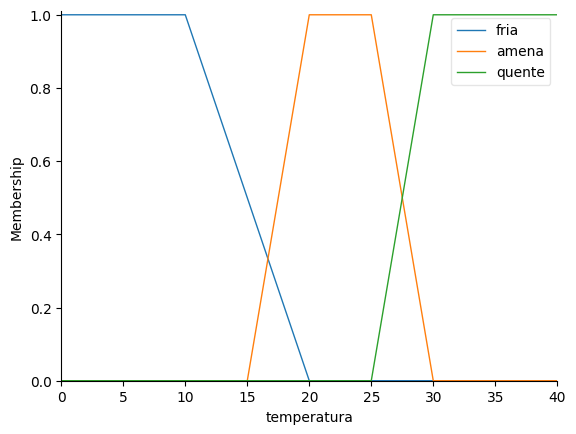

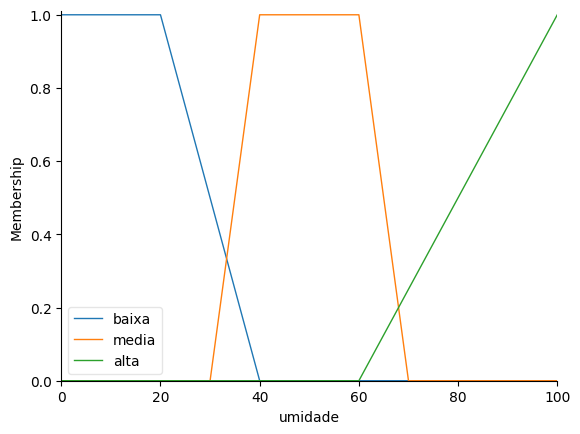

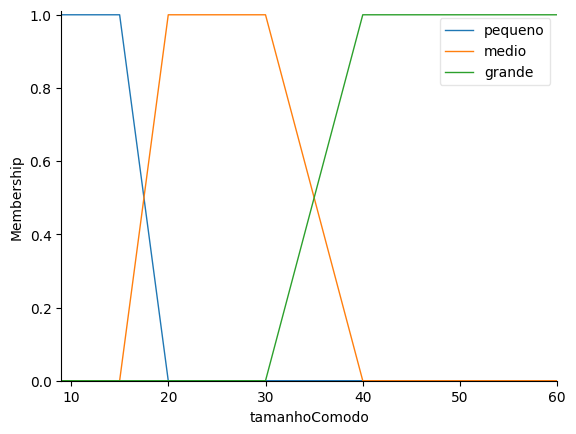

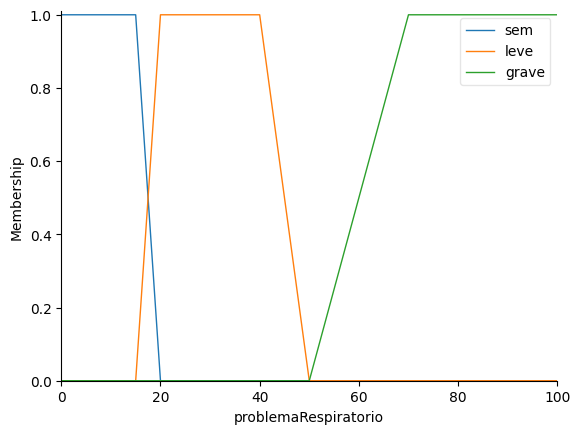

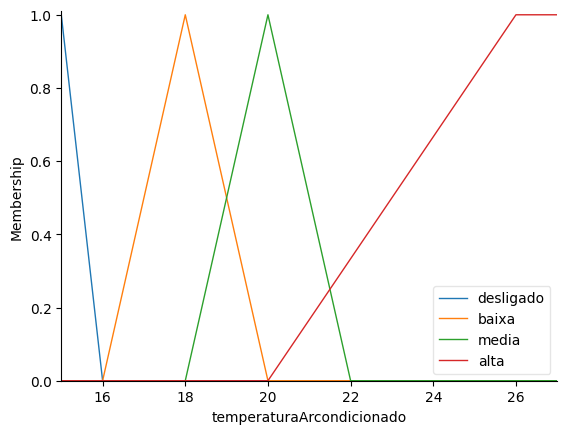

In [6]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as crtl


#definições das variaveis e universos
temperatura = crtl.Antecedent(np.arange(0, 41, 1), 'temperatura')
umidade = crtl.Antecedent(np.arange(0, 101, 1), 'umidade')
tamanho_comodo = crtl.Antecedent(np.arange(9, 61, 1), 'tamanhoComodo')
problema_respiratorio = crtl.Antecedent(np.arange(0, 101, 1), 'problemaRespiratorio')
temperatura_arcondicionado = crtl.Consequent(np.arange(15, 28, 1), 'temperaturaArcondicionado')

#definição das funções de pertinencia
temperatura['fria'] = fuzz.trapmf(temperatura.universe, [0, 0, 10, 20])
temperatura['amena'] = fuzz.trapmf(temperatura.universe, [15, 20, 25, 30])
temperatura['quente'] = fuzz.trapmf(temperatura.universe, [25, 30, 40, 40])

umidade['baixa'] = fuzz.trapmf(umidade.universe, [0, 0, 20, 40])
umidade['media'] = fuzz.trapmf(umidade.universe, [30, 40, 60, 70])
umidade['alta'] = fuzz.trimf(umidade.universe, [60, 100, 100])

tamanho_comodo['pequeno'] = fuzz.trapmf(tamanho_comodo.universe, [9, 9, 15, 20])
tamanho_comodo['medio'] = fuzz.trapmf(tamanho_comodo.universe, [15, 20, 30, 40])
tamanho_comodo['grande'] = fuzz.trapmf(tamanho_comodo.universe, [30, 40, 60, 60])

problema_respiratorio['sem'] = fuzz.trapmf(problema_respiratorio.universe, [0, 0, 15, 20])
problema_respiratorio['leve'] = fuzz.trapmf(problema_respiratorio.universe, [15, 20, 40, 50])
problema_respiratorio['grave'] = fuzz.trapmf(problema_respiratorio.universe, [50, 70, 100, 100])


temperatura_arcondicionado['desligado'] = fuzz.trimf(temperatura_arcondicionado.universe, [15, 15, 16])
temperatura_arcondicionado['baixa'] = fuzz.trimf(temperatura_arcondicionado.universe, [16,18, 20])
temperatura_arcondicionado['media'] = fuzz.trimf(temperatura_arcondicionado.universe, [18, 20, 22])
temperatura_arcondicionado['alta'] = fuzz.trapmf(temperatura_arcondicionado.universe, [20, 26, 28, 28])

temperatura.view()
umidade.view()
tamanho_comodo.view()
problema_respiratorio.view()
temperatura_arcondicionado.view()


In [55]:
#Definição das regras

#desligado
rule1 = crtl.Rule(temperatura['fria'] | (problema_respiratorio['grave'] & umidade['baixa'])
                  ,temperatura_arcondicionado['desligado'])

#temperatura do arcondicionado alta
rule2 = crtl.Rule((umidade['media'] & problema_respiratorio['grave'])
                  | (temperatura['amena']
                    & (umidade['baixa'])
                    &  (tamanho_comodo['pequeno'] | tamanho_comodo['medio']))
                  , temperatura_arcondicionado['alta'])


#temperatura do arcondicionado media
rule3 = crtl.Rule(temperatura['amena']
                  & (umidade['media'] | umidade['alta'])
                  & (tamanho_comodo['grande'])
                  , temperatura_arcondicionado['media'])


#temperatura do arcondicionado baixa
rule4 = crtl.Rule((temperatura['quente'] | temperatura['amena'])
                  & (umidade['alta'] | umidade['media']),
                  temperatura_arcondicionado['baixa'])



#simulação
temperatura_arcondicionado_ctrl = crtl.ControlSystem([rule1, rule2, rule3, rule4])
temperatura_arcondicionado_simulador = crtl.ControlSystemSimulation(temperatura_arcondicionado_ctrl)
# Método de defuzzificação alterado para 'mom' (Maximum of Maximum)
temperatura_arcondicionado.defuzzify_method = 'mom'


In [56]:
while True:
  temp = float(input("Digite a temperatura (°C): "))

  if(temp<0 or temp>45):
    print("Temperatura inválida! Deve estar entre 0 e 45")
    continue
  temperatura_arcondicionado_simulador.input['temperatura'] = temp
  break

while True:
  umid = float(input("Digite a umidade (%): "))

  if(umid<0 or umid>100):
    print("Umidade inválida! Deve estar entre 0 e 100")
    continue
  temperatura_arcondicionado_simulador.input['umidade'] = umid
  break

while True:
  tamComodo = float(input("Digite o tamanho do comodo 9 a 60(m²): "))

  if(tamComodo<0 or tamComodo>60):
    print("Umidade inválida! Deve estar entre 9 e 60")
    continue
  temperatura_arcondicionado_simulador.input['tamanhoComodo'] = tamComodo
  break

while True:
  print("Sem problema digite 0: ")
  print("problema leve digite 1: ")
  print("problema grave digite 2: ")
  problemaResp = float(input("problema Respiratorio: "))

  if(problemaResp<0 or problemaResp>2):
    print("Umidade inválida! Deve estar entre 0 e 2")
    continue

  if(problemaResp == 0):
    temperatura_arcondicionado_simulador.input['problemaRespiratorio'] = 0
  elif(problemaResp == 1):
    temperatura_arcondicionado_simulador.input['problemaRespiratorio'] = 25
  else:
    temperatura_arcondicionado_simulador.input['problemaRespiratorio'] = 100
  break


Digite a temperatura (°C): 27
Digite a umidade (%): 40
Digite o tamanho do comodo 9 a 60(m²): 12
Sem problema digite 0: 
problema leve digite 1: 
problema grave digite 2: 
problema Respiratorio: 0


Temperatura do Ar-condicionado é de 18 °C
 
 
 
 


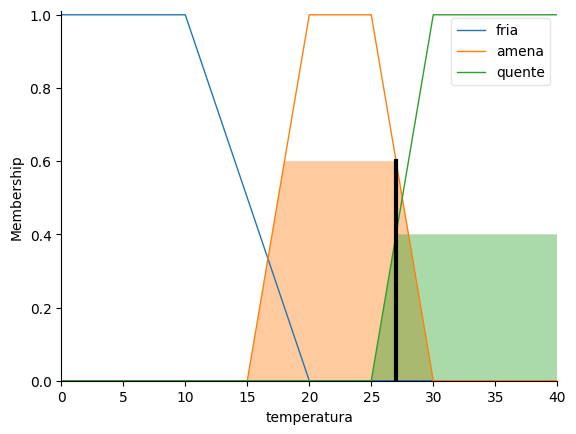

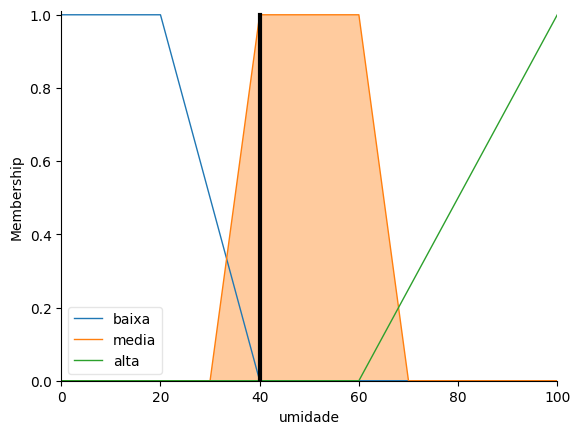

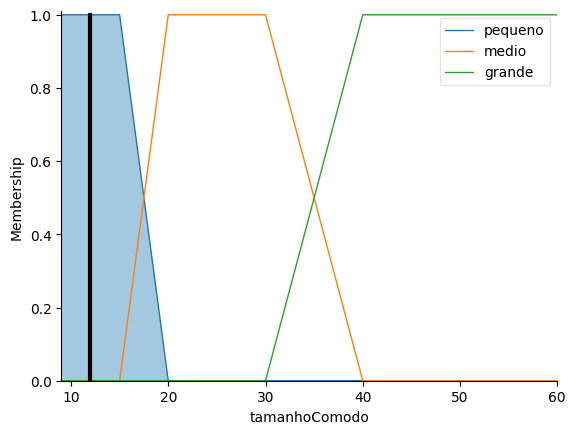

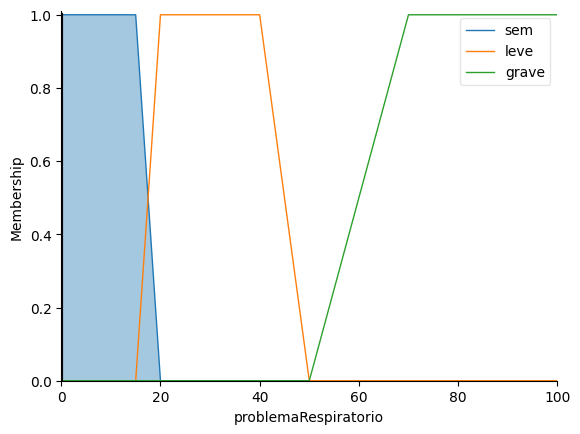

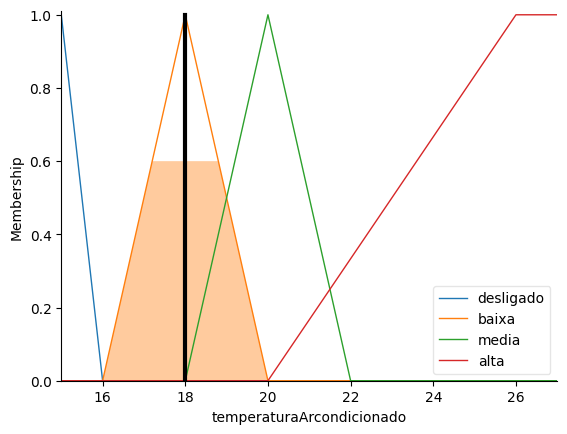

In [57]:
temperatura_arcondicionado_simulador.compute()
if(temperatura_arcondicionado_simulador.output['temperaturaArcondicionado'] != 15):
  print('Temperatura do Ar-condicionado é de %i °C' % temperatura_arcondicionado_simulador.output['temperaturaArcondicionado'])
else:
  print('Ar-condicionado desligado')
temperatura.view(sim=temperatura_arcondicionado_simulador)
print(' ')
umidade.view(sim=temperatura_arcondicionado_simulador)
print(' ')
tamanho_comodo.view(sim=temperatura_arcondicionado_simulador)
print(' ')
problema_respiratorio.view(sim=temperatura_arcondicionado_simulador)
print(' ')

temperatura_arcondicionado.view(sim=temperatura_arcondicionado_simulador)